<a href="https://colab.research.google.com/github/zCoCo/24677/blob/master/PS1/2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cwcolomb - 24677 - PS1 - 2.2**

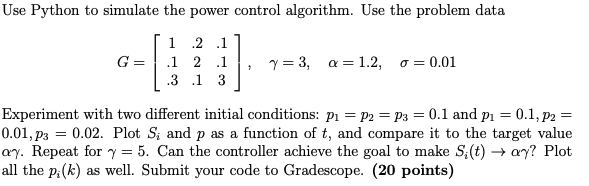

In [112]:
import numpy as np
from scipy.signal import StateSpace, lsim
import matplotlib.pyplot as plt

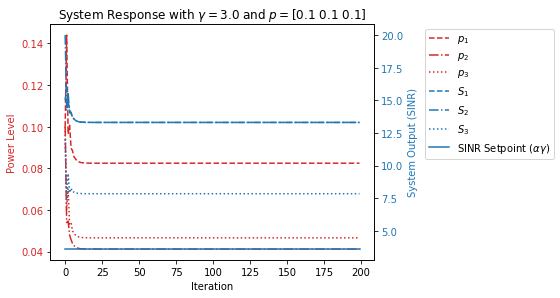

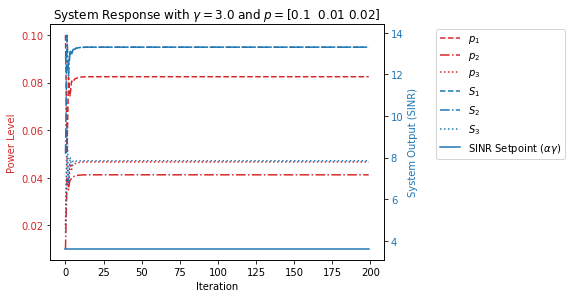

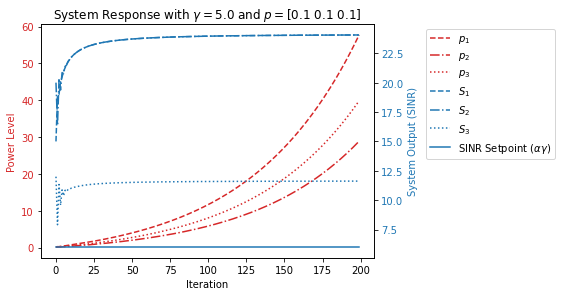

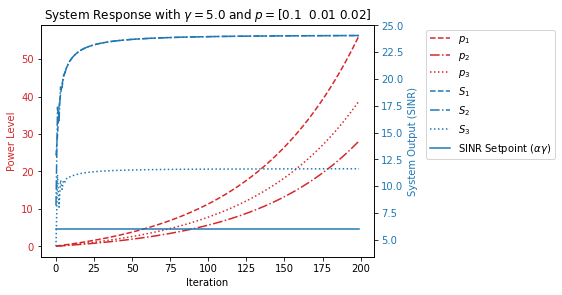

In [198]:
def simulate(p0, gam):
  # Runs a simulation. All common code used between each trial is contained here.
  ## SETUP:
  alf = 1.2; #  Alpha (safety factor)
  sig = 0.1; # Sigma (updated value given on Campuswire)

  # Gains Matrix:
  G = np.asarray([[1., .2, .1],
                  [.1, 2, .1],
                  [.3, .1, 3]]);


  ## CONSTRUCT MATRICES:
  # Construct a helper matrix that is G but with the diag set to zero 
  # (used for summing where j \neq i):
  G__j_neq_i = G.copy();
  np.fill_diagonal(G__j_neq_i, 0);

  # State Space Matrices
  A = alf * gam * G / np.diag(G).reshape(-1,1);
  np.fill_diagonal(A, 0);

  B = alf*gam / np.diag(G).reshape(-1,1);

  ## HELPER FUNCTIONS:
  def SINR(pk):
    # Computes the SINR of the given system state.
    sk = np.diag(G).reshape(1,-1).dot(pk);
    qk = sig**2 + G__j_neq_i.dot(pk);
    return sk/qk;

  ## SIMULATE:
  t = np.arange(200);

  # Preallocate timeseries for speed:
  p = np.zeros((3,t.size));
  S = np.zeros((3,t.size));

  # Initialize Timeseries with Initial Condition:
  p[:,0] = p0;
  S[:,[0]] = SINR(p[:,0].reshape(-1,1));

  for i in range(1,t.size):
    pk = p[:, i-1].reshape(-1,1);
    # Compute p(k+1):
    p[:,[i]] = A.dot(pk) + B*(sig**2);
    # Compute SINR at p(k+1):
    S[:,[i]] = SINR(p[:,i].reshape(-1,1));

  ## PLOT RESULTS:
  fig, ax1 = plt.subplots();

  color = 'tab:red';
  ax1.set_xlabel('Iteration');
  ax1.set_ylabel('Power Level', color=color);
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.plot(t, p[0,:], label="$p_1$", color=color, linestyle="--");
  ax1.plot(t, p[1,:], label="$p_2$", color=color, linestyle="-.");
  ax1.plot(t, p[2,:], label="$p_3$", color=color, linestyle=":");

  ax2 = ax1.twinx();
  color = 'tab:blue';
  ax2.set_ylabel('System Output (SINR)', color=color);
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.plot(t, S[0,:], label="$S_1$", color=color, linestyle="--");
  ax2.plot(t, S[1,:], label="$S_2$", color=color, linestyle="-.");
  ax2.plot(t, S[2,:], label="$S_3$", color=color, linestyle=":");
  ax2.plot(t, alf*gam*np.ones(t.size), label=r"SINR Setpoint ($\alpha\gamma$)", linestyle="-");

  fig.tight_layout();

  lines1, labels1 = ax1.get_legend_handles_labels();
  lines2, labels2 = ax2.get_legend_handles_labels();
  plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.14,1));
  
  plt.title("System Response with $\gamma=%s$ and $p=$%s" % (gam,p0));
  plt.show();


## RUN SIMULATIONS:

simulate(np.asarray([0.1,0.1,0.1]), 3.);
simulate(np.asarray([0.1,0.01,0.02]), 3.);

simulate(np.asarray([0.1,0.1,0.1]), 5.);
simulate(np.asarray([0.1,0.01,0.02]), 5.);